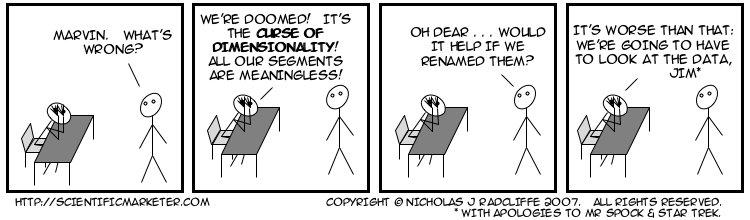

### Feature Engineering 

In [1]:
import numpy as np
import pandas as pd
import feature_engine as fe
import sklearn 
import sklearn.decomposition
import missing_values_module as mvm

In [45]:
sklearn.__version__

'0.24.1'

### PCA

Базовый модуль: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
Также нетерпим к наличию категориальных переменных в данных и, судя по всему, не имеет параметра типа exclude, поэтому сначала проверим, как он работает с датасетом без них вообще, а потом применим уже использованную функцию teach_to_separate для получения модифицированного класса (ее придется подправить)

In [12]:
test_df = mvm.create_test_df(nans = False) #создадим тестовый сет

In [13]:
test_df_trunctated = test_df.copy().drop("xcat", 1)
PCAer = sklearn.decomposition.PCA(n_components = 2,  #сколько оставить компонентов; по дефолту - все
                            whiten = False,      #отключаем whitening - декорреляцию фичей
                            svd_solver = "full",#детали SVD преобразования, за подробностями см. доки
                    )

PCAer.fit(test_df_trunctated)
pd.DataFrame(PCAer.transform(test_df_trunctated))


,0,1
0,-0.783221,-0.266929
1,0.464608,-0.260743
2,0.337837,0.043469
3,0.791120,0.084346
4,-0.298017,0.001217
...,...,...
9995,0.748371,-0.841429
9996,0.240524,0.502240
9997,-2.984473,0.033370
9998,-0.056106,0.923660


In [14]:
PCASeparated = mvm.teach_to_separate(sklearn.decomposition.PCA)
PCAer = PCASeparated(categorical_variables = ["xcat"], #параметр для отделения категориальных переменных, добавленный дочерним классом
                     functionality = "PCA", #параметр, который определяет функциональность, добавленный дочерним классом. В данный момент imputer или PCA
                     n_components = 2,  #сколько оставить компонентов; по дефолту - все
                     whiten = False,      #отключаем whitening - декорреляцию фичей
                     svd_solver = "full",#детали SVD преобразования, за подробностями см. доки
                             
                    )

PCAer.fit(test_df)
PCAer.transform(test_df)
#test_df

,PC1,PC2,xcat
0,-0.783221,-0.266929,c
1,0.464608,-0.260743,c
2,0.337837,0.043469,b
3,0.791120,0.084346,c
4,-0.298017,0.001217,e
...,...,...,...
9995,0.748371,-0.841429,e
9996,0.240524,0.502240,e
9997,-2.984473,0.033370,d
9998,-0.056106,0.923660,d


### [Kernel PCA](http://pca.narod.ru/scholkopf_kernel.pdf)

Нелинейная форма PCA. Опорные компоненты вычисляются для фич преобразованных функцией $\Phi$. При этом преобразование не делается явно, компоненты вычисляются на основе kernel function. Это позволяет практически не повышать требования к производительности при росте размерности. В статье выше предлагается использовать стандартные kernels от SVM. Функция также реализована в модуле [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html). На странице модуля есть ссылка на краткое описание разных типов релизованных там [ядер](https://scikit-learn.org/stable/modules/metrics.html#metrics).

In [15]:
test_df = mvm.create_test_df(nans = False) #создадим тестовый сет

In [16]:
test_df_trunctated = test_df.copy().drop("xcat", 1)
PCAer = sklearn.decomposition.KernelPCA(n_components = 2,  #сколько оставить компонентов; по дефолту - все
                            kernel = "linear", #ядро. По дфеолту линейное. Можно сделать своё, но тогда его нужно предварительно вычислить отдельно,
                                        #поставить kernel = "precomputed" и передать уже вычисленное ядро в качестве X
                            degree = 3, #степень полинома для некоторых типов ядер. Важный параметр для тьюнинга, но сильно напрягает процессор
                            n_jobs = 2 #объект умеет быть многопоточным! -1 займет все ядра
                    )

PCAer.fit(test_df_trunctated)
pd.DataFrame(PCAer.transform(test_df_trunctated))


,0,1
0,1.019124,-1.217830
1,-0.449440,-0.953710
2,0.524782,-0.271605
3,1.320125,0.443869
4,1.004041,-1.325974
...,...,...
9995,-0.558412,0.537602
9996,1.368841,-0.357982
9997,-0.121105,-2.029246
9998,0.291048,1.016159


In [29]:
PCASeparated = mvm.teach_to_separate(sklearn.decomposition.KernelPCA)
PCAer = PCASeparated(n_components = 2,  #сколько оставить компонентов; по дефолту - все
                            kernel = "poly", #ядро. По дфеолту линейное. Можно сделать своё, но тогда его нужно предварительно вычислить отдельно,
                                        #поставить kernel = "precomputed" и передать уже вычисленное ядро в качестве X
                            degree = 3, #степень полинома для некоторых типов ядер. Важный параметр для тьюнинга, но сильно напрягает процессор
                            n_jobs = 2, #объект умеет быть многопоточным! -1 займет все ядра
                            categorical_variables = ["xcat"], #параметр дочернего класса
                            functionality = "PCA" #параметр дочернего класса
                    )

PCAer.fit(test_df)
PCAer.transform(test_df)


,PC1,PC2,xcat
0,0.150692,-0.725130,c
1,-0.308353,-0.549749,c
2,0.027752,-0.667231,e
3,0.565045,0.171049,a
4,0.139485,-0.579280,a
...,...,...,...
9995,-0.262513,-0.788870,c
9996,0.521188,0.032962,e
9997,-0.163336,-0.893484,e
9998,-0.095200,-0.879552,e


#### Теперь попробуем встроить это в пайплайн

In [20]:
#подгрузим всякое разное для пайплайна
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from hyperopt import hp
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# for HyperOpt class
import lightgbm as lgb
import xgboost as xgb
# import catboost as ctb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
# новый пакет!
from feature_engine.encoding import WoEEncoder
from feature_engine.creation import CombineWithReferenceFeature
from feature_engine.selection import RecursiveFeatureAddition
from sklearn.pipeline import Pipeline
X_train = pd.read_parquet('../datasets/15_hmeq/samples/X_train.parquet')
X_test  = pd.read_parquet('../datasets/15_hmeq/samples/X_test.parquet')
y_train = pd.read_parquet('../datasets/15_hmeq/samples/y_train.parquet').target
y_test  = pd.read_parquet('../datasets/15_hmeq/samples/y_test.parquet').target
with open('../datasets/15_hmeq/factors.json') as json_file:
    factors_dict = json.load(json_file)

factors_dict['cat_vals']
factors_dict['cat_vals'].remove('target')
seed = 42

def Gini(y, y_pred):
    res = roc_auc_score(y, y_pred) * 2 - 1
    print(f"Gini: {res}")
    return(res)




In [87]:
def teach_to_separate(parent_transformer):
    """
    Returns an object, which does exactly the same as the parent class 'parent_transformer', but before doing so separates the data into numerical and categorical columns and applies the transformation only to numerical ones. It also returns DataFrame, even when the parent class by default returns, for example, a 3-d numpy array and renames principal components, if this approach is used like "PC1", "PC2" etc.
    Example of usage: 
    >KNNImputerSeparated = teach_to_separate(KNNImputer)
    >obj = KNNImputerSeparated(categorical_variables = ["xcat"], n_neighbors = 6)
    >test_df = create_test_df()
    >obj.fit(test_df)
    >obj.transform(test_df)
    
    parent_transformer::class A parent class. Must have fit and transform attributes.
    
    Variables provided when instance is created:
    
    categorical_variables::list A list or an array, which contains a list of variables which must be separated and to which the transformation will not be applied
    
    functionality::str A string which defines what type of transformer class you are modifying. Currently there are option 'imputer' for all the imputers and 'PCA' for sklearn.PCA. 
    
    **kwargs Any arguments passed to parent class itself
    
    """
    
    class SeparatedDF():
        def __init__(self, X, categorical_variables = []):
            self.X_numeric = X.drop(categorical_variables, 1)
            self.X_categorical = X.copy()[categorical_variables]

    class ImputerSeparated(parent_transformer):

        def __init__(self, categorical_variables, functionality = "imputer", **kwargs):
            super().__init__(**kwargs)
            self.categorical_variables = categorical_variables
            self.obj = parent_transformer(**kwargs)
            if functionality not in ["imputer", "PCA"]:
                print(f"You inputed functionality {functionality}, but currently only\n 'imputer' and 'PCA' are implemented")
            self.functionality = functionality
            

        def fit(self, X, y = None):
            print("You are here 1")
            df = SeparatedDF(X, self.categorical_variables)
            #print(df.X_numeric)
            self.obj.fit(df.X_numeric)

            #self.__dict__.update(self.obj.__dict__)
            return self

        def transform(self, X, y = None):
            print("You are here 2")

            df = SeparatedDF(X, self.categorical_variables)
            #print(df.X_numeric)

            fitted_df = self.obj.transform(df.X_numeric)
            fitted_df = pd.DataFrame(fitted_df)

            if self.functionality == "imputer":
                fitted_df.columns = df.X_numeric.columns
            elif self.functionality == "PCA":
                fitted_df.columns = [f"PC{i}" for i in range(1, self.obj.n_components+1)]
            fitted_df = pd.concat([fitted_df, df.X_categorical], axis = 1)

            return fitted_df
    return ImputerSeparated


In [88]:
PCASeparated = mvm.teach_to_separate(sklearn.decomposition.PCA)

feat_eng = PCASeparated(categorical_variables = factors_dict["cat_vals"], #параметр для отделения категориальных переменных, добавленный дочерним классом
                     functionality = "PCA")

PCAKernelSeparated = teach_to_separate(sklearn.decomposition.KernelPCA)

feat_eng_kernel = PCAKernelSeparated(categorical_variables = factors_dict["cat_vals"], #параметр для отделения категориальных переменных, добавленный дочерним классом
                     functionality = "PCA",
                       kernel = "poly",
                       n_jobs = 5,
                        gamma = 3,
                       n_components = 2)

In [89]:
#woe = WoEEncoder(variables = factors_dict['cat_vals'])

missing_impute = mvm.missing_filler_mean( 
                                     filling_category = "missing",
                                     categorical_variables = factors_dict["cat_vals"])

lgbm_mdl = LGBMClassifier(
    num_leaves = 10,
    learning_rate = .1,
    reg_alpha = 8,
    reg_lambda = 8,
    random_state = seed
)

feat_sel = RecursiveFeatureAddition(
    lgbm_mdl,
    threshold = 0.005
)


print("With PCA:")
mdl_pipe_impute = Pipeline(
    [('impute_missing', missing_impute),('encode', woe), ('feat_eng', feat_eng), ('feat_select', feat_sel), ('lgbm', lgbm_mdl)]
)

mdl_pipe_impute.fit(X_train, y_train)
Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])

Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])

# missing_impute_trunc = mvm.missing_filler_mean( 
#                                      filling_category = "missing",
#                                      categorical_variables = [])
# X_train_trunc = X_train.copy().drop(factors_dict["cat_vals"], axis = 1)
# X_test_trunc = X_test.copy().drop(factors_dict["cat_vals"], axis = 1)

# feat_eng_kernel_trunc = sklearn.decomposition.KernelPCA(
#                        kernel = "poly",
#                        n_jobs = 5,
#                        n_components = 2)

# print("With polynomial kernel PCA truncated manually:")
# print(X_train_trunc)
# mdl_pipe_impute = Pipeline(
#     [('impute_missing', missing_impute_trunc), ('feat_eng', feat_eng_kernel_trunc), ('feat_select', feat_sel), ('lgbm', lgbm_mdl)]
# )

# mdl_pipe_impute.fit(X_train_trunc, y_train)
# Gini(y_train, mdl_pipe_impute.predict_proba(X_train_trunc)[:, 1])

# Gini(y_test, mdl_pipe_impute.predict_proba(X_test_trunc)[:, 1])



print("With polynomial kernel PCA:")
mdl_pipe_impute = Pipeline(
    [('impute_missing', missing_impute),('encode', woe), ('feat_eng', feat_eng_kernel), ('feat_select', feat_sel), ('lgbm', lgbm_mdl)]
)

print(X_train)
mdl_pipe_impute.fit(X_train, y_train)
print(X_train)
Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])

Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])



print("With no PCA:")
mdl_pipe_impute = Pipeline(
    [('impute_missing', missing_impute),('encode', woe), ('feat_select', feat_sel), ('lgbm', lgbm_mdl)]
)
mdl_pipe_impute.fit(X_train, y_train)
Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])

Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])


With PCA:


NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Пока не норм.

## Выводы

1. Как и другие объекты sklearn, имеет баг (или фичу) с категориальными переменными и форматом возвращаемой таблицы. Предлагаю исправлять его с помощью teach_to_separate. Допилил его функционал, теперь он работает и с PCA. 
2. В остальном работает норм. 
3. Самый интересный параметр для тьнинга PCA и KernelPCA - n_components, который показывает, сколько компонентов оставить.
4. KernelPCA вообще оставляет поле для фантазии на предмет того, какую функцию ядра выбрать и какие тьюнинг-параметры ей передать. Правда, по опыту увеличение степени полинома, скажем, очень замедляет обучение по естественным причинам